# Experimentation Pipeline

This notebook is the definitive experimentation NFL 2022 pipeline, where we will explore how our different tests are doing.

In [4]:
import os
import re
import sys
import tqdm
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import random
import seaborn as sns

# Libraries required for plotting field
import matplotlib.patches as patches
from matplotlib.patches import Arc
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import animation
from IPython.display import HTML
from IPython import display


# Custom libraries
sys.path.append('../')
from src.utils.viz_functions import visualize_play
from src.utils.play_preprocessing import preprocessPlay_refQB_NFrames, preprocessPlay_refQB, preprocessPlay_refLineScrimmageInit
from src.utils.player_influence import extract_play_players_influence, gaussian_player_influence_score
from src.utils.field_price_functions import calculate_field_price, gaussian_field_price
from src.utils.calculate_score import calculate_score
from src.utils.full_pipeline import run_full_pipeline, run_short_pipeline

In [5]:
# Define input parameters
input_path = '../input'
preprocessing_path = '../processing'

config = {
    # Preprocessing Play parameters
    'preprocess_funct': preprocessPlay_refLineScrimmageInit,
    'hold_QB_ref': 20,
    'post_snap_time': 8,

    # Pocket parameters
    'pocket_len': 10.0,
    'pocket_res': 0.1,

    # Field Price parameters
    'pocket_linear_max_value': 1.0,
    'pocket_gaus_mu': 0.0,
    'pocket_gaus_sigma': 5.0,
    'field_price_funct': gaussian_field_price,

    # Player Influence parameters
    'gaus_mu': 0.0,
    'gaus_sigma': 2.0,
    'player_infl_funct': gaussian_player_influence_score
}

# 1. Run Full Pipeline

In [6]:
run_full_pipeline(input_path, preprocessing_path, config)

- Analyzing week1.csv


  3%|▎         | 33/1175 [00:07<04:16,  4.45it/s]


# 2. Explore and Visualize Single Plays

       frameId      x      y
76360        1  78.55  24.19
76361        2  78.55  24.20
76362        3  78.55  24.20
76363        4  78.54  24.20
76364        5  78.52  24.20
76365        6  78.51  24.20
76366        7  78.50  24.21
76367        8  78.48  24.21
76368        9  78.46  24.21
76369       10  78.38  24.22
76370       11  78.22  24.24
76371       12  77.98  24.26
76372       13  77.67  24.28
76373       14  77.31  24.30
76374       15  76.91  24.32
76375       16  76.49  24.32
76376       17  76.04  24.35
76377       18  75.58  24.36
76378       19  75.12  24.37
76379       20  74.67  24.37
76380       21  74.67  24.37
76381       22  74.67  24.37
76382       23  74.67  24.37
76383       24  74.67  24.37
76384       25  74.67  24.37
76385       26  74.67  24.37
76386       27  74.67  24.37
76387       28  74.67  24.37
76388       29  74.67  24.37
76389       30  74.67  24.37
76390       31  74.67  24.37
76391       32  74.67  24.37


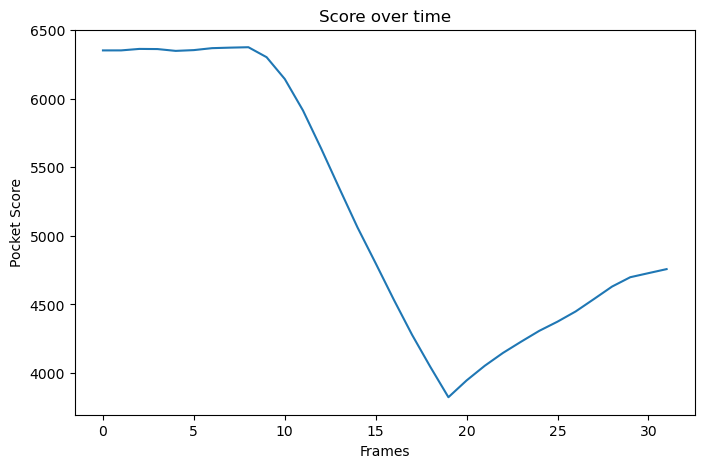

In [3]:
week1_data = pd.read_csv(os.path.join(input_path, 'week1.csv'))

# Define Game & Play ID
gameId = "2021090900"
playId = "3933"
# gameId = "2021091201"
# playId = "691"

# Visualize play
visualize_play(week1_data, gameId, playId, config)

# 3. Reduced List of Plays to Explore

In [4]:
plays = pd.read_csv(f"{input_path}/plays_analysis.csv")
plays.head(5)

,weekId,gameId,playId
0,week1.csv,2021090900,2088
1,week1.csv,2021090900,3933
2,week1.csv,2021091200,2720
3,week1.csv,2021091201,639
4,week1.csv,2021091201,691


100%|██████████| 7/7 [00:12<00:00,  1.82s/it]


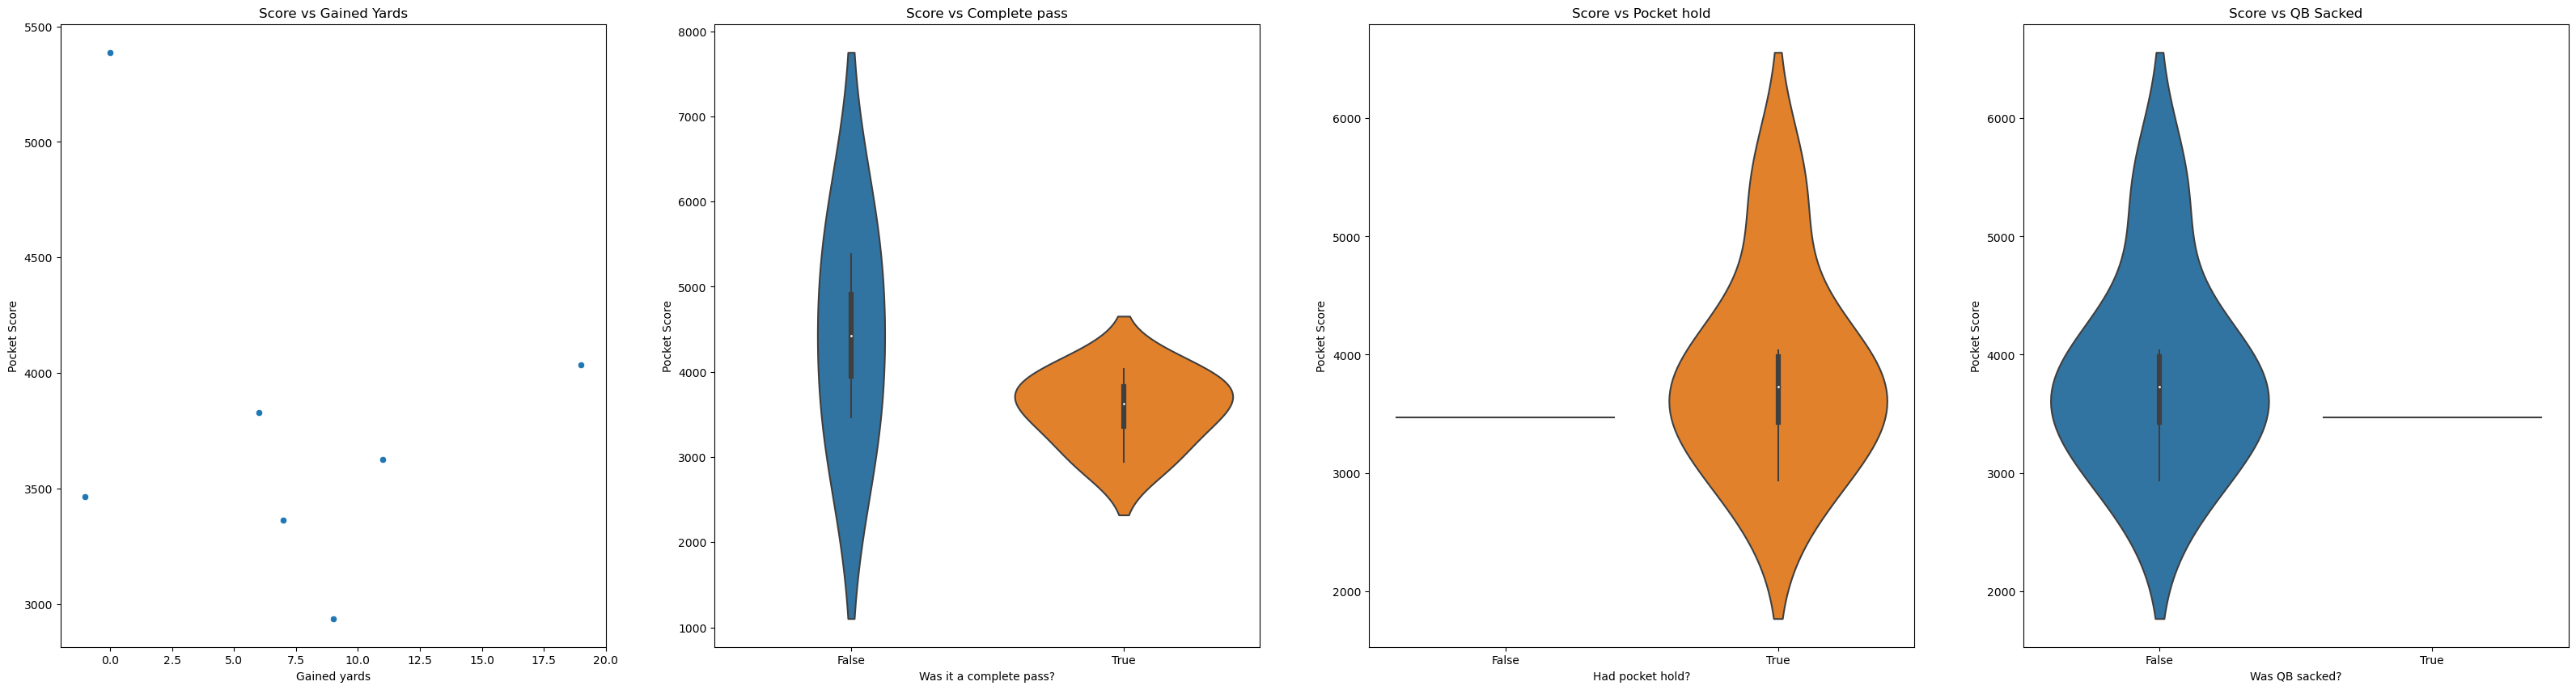

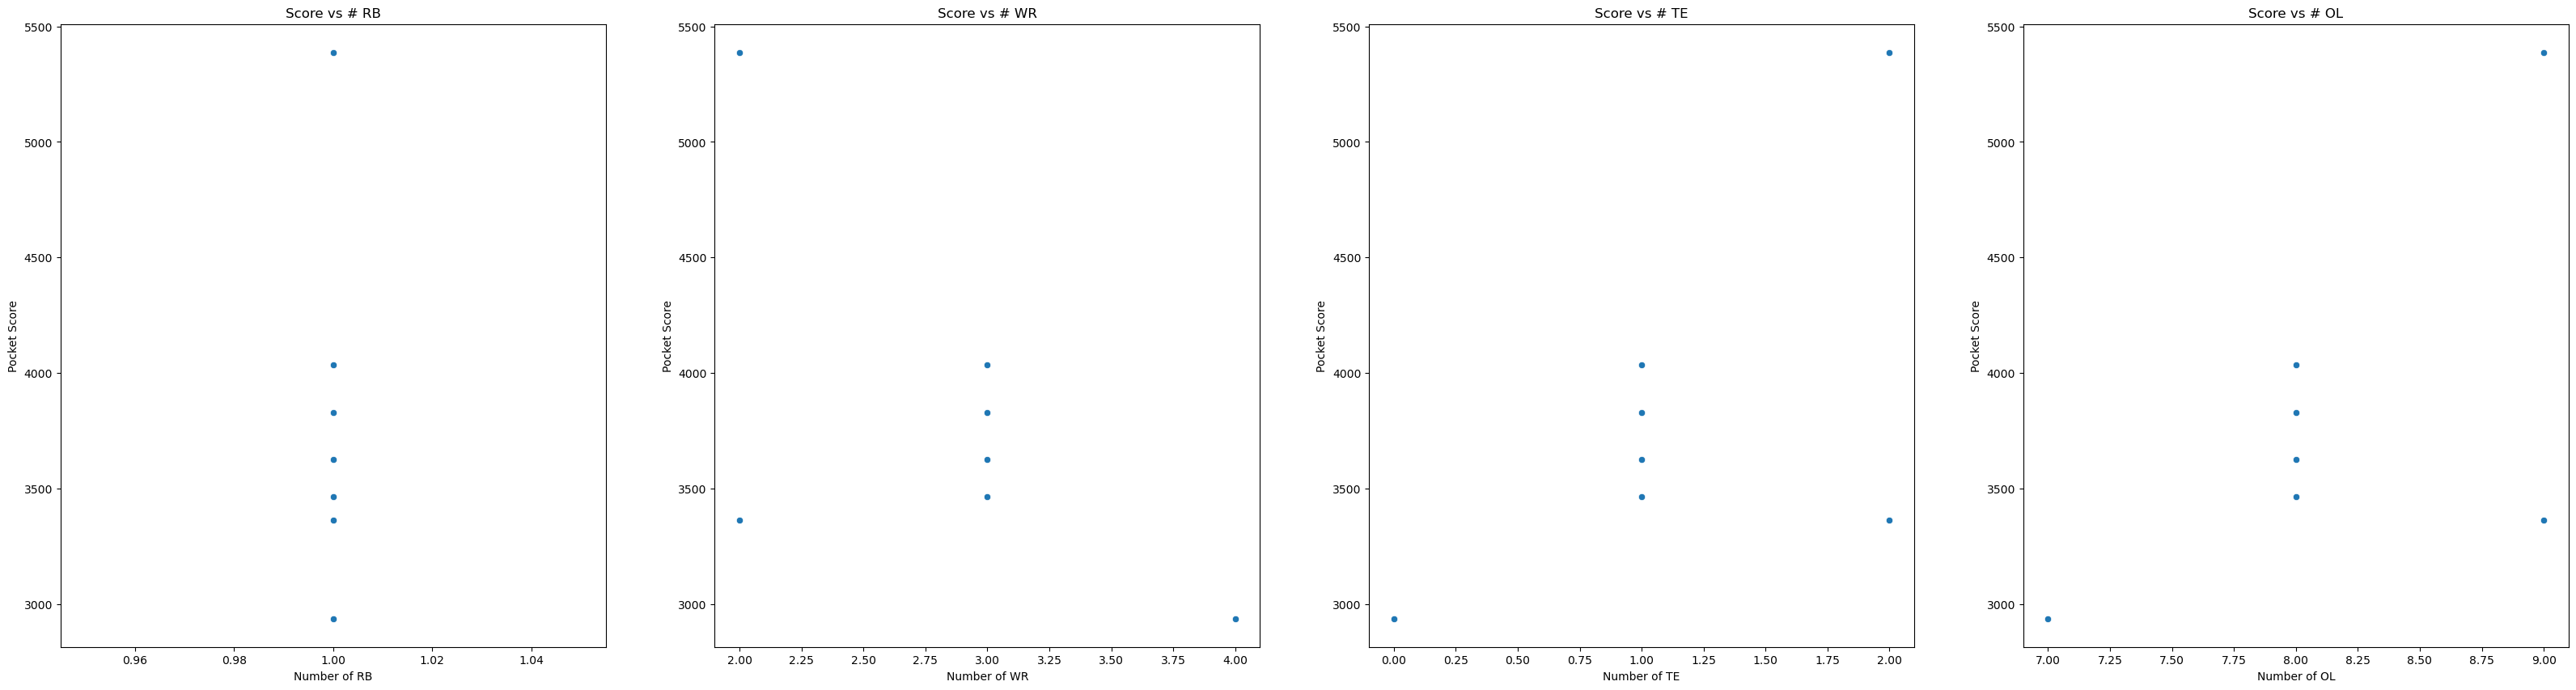

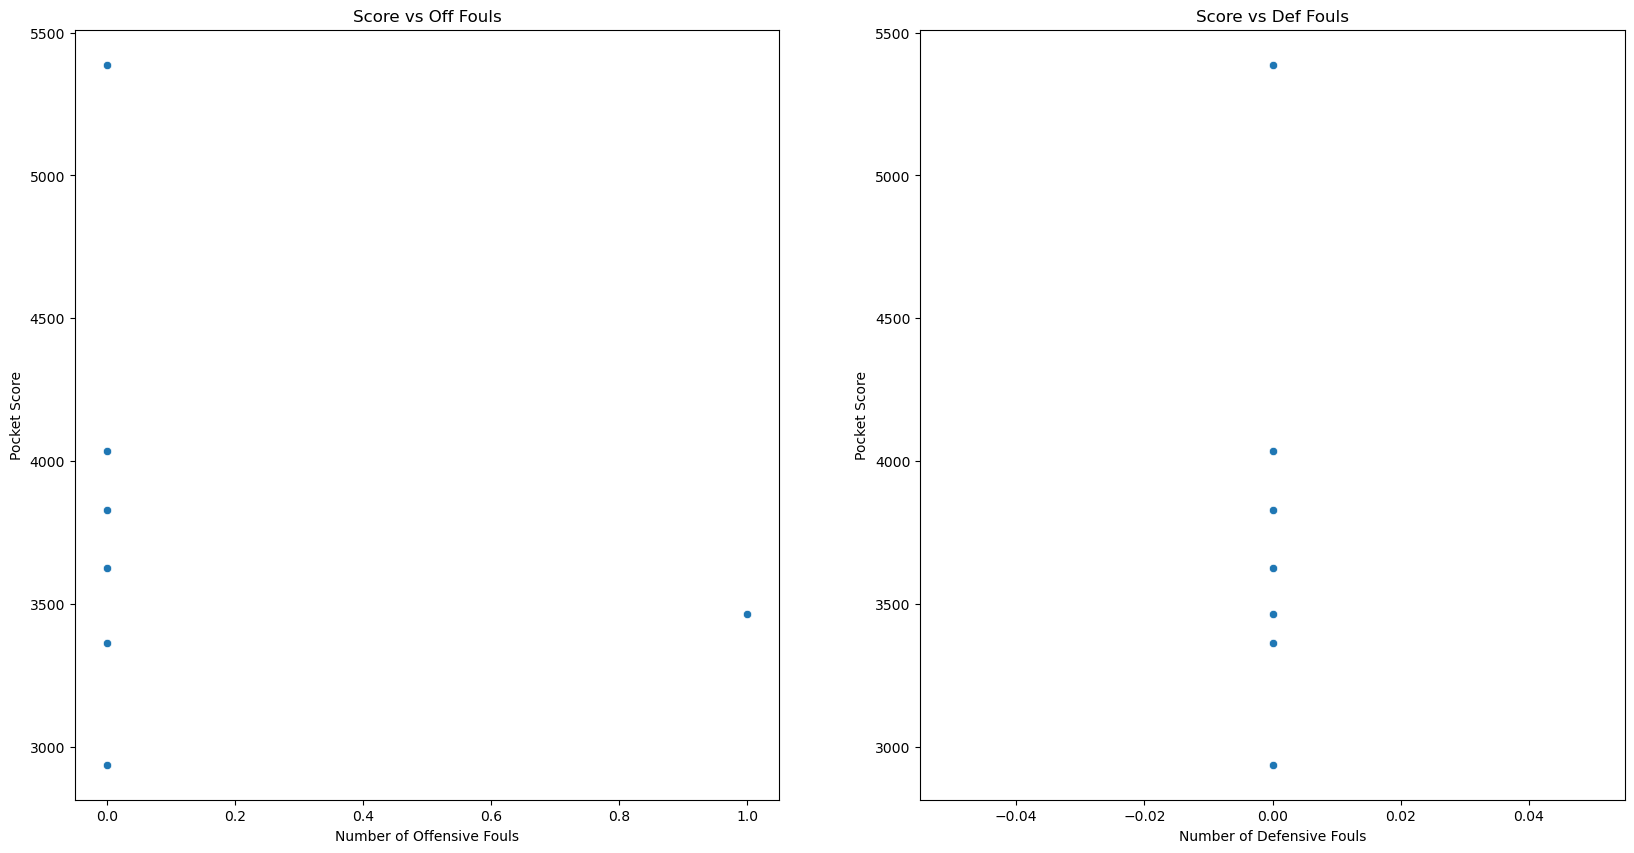

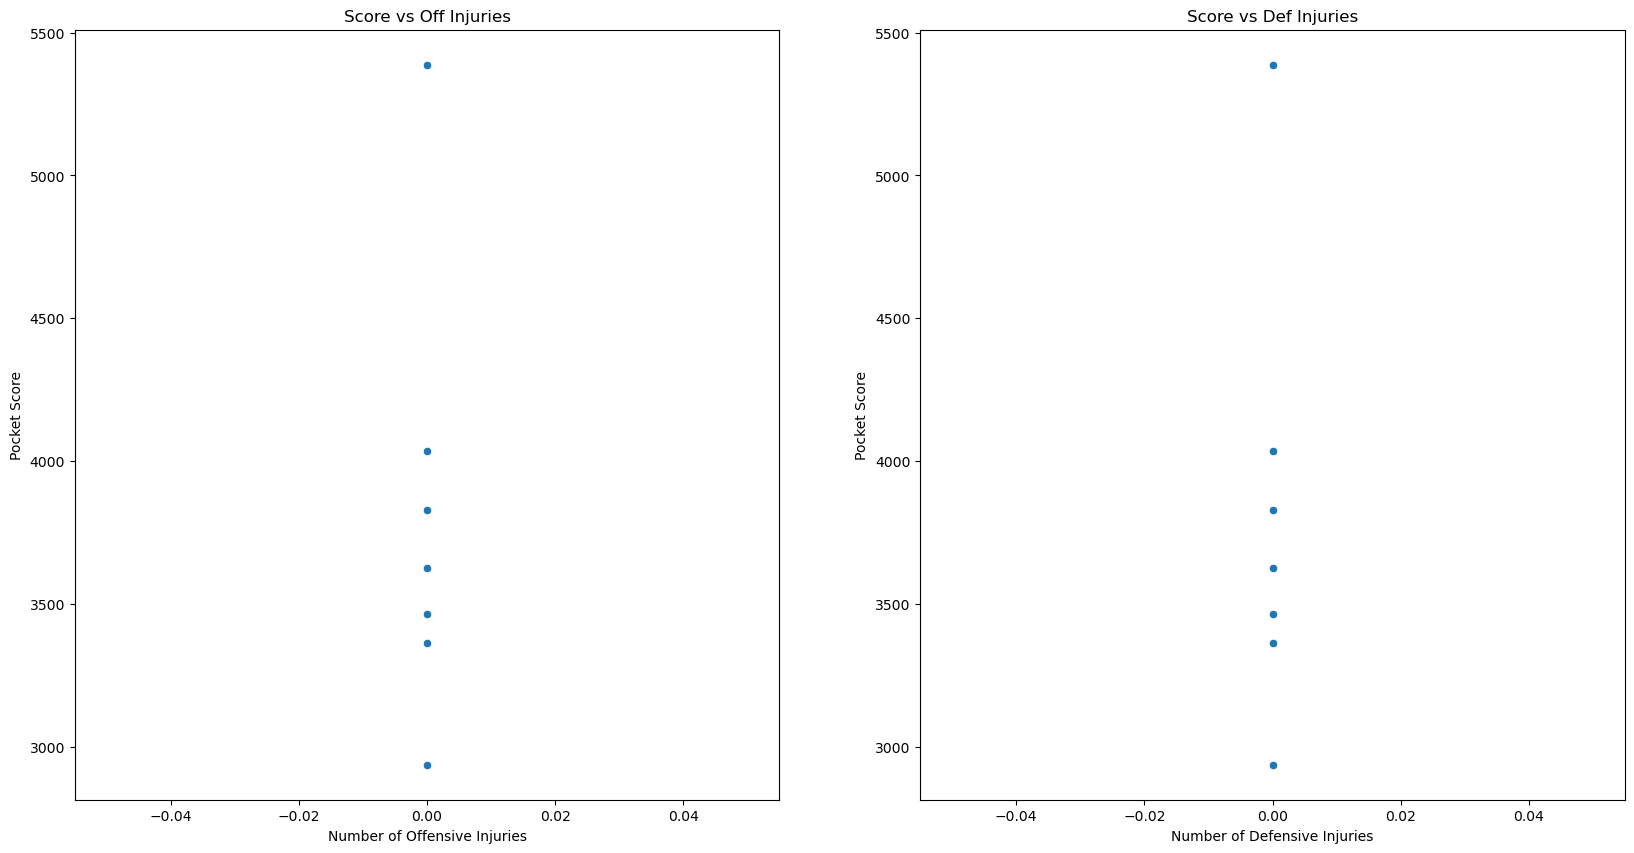

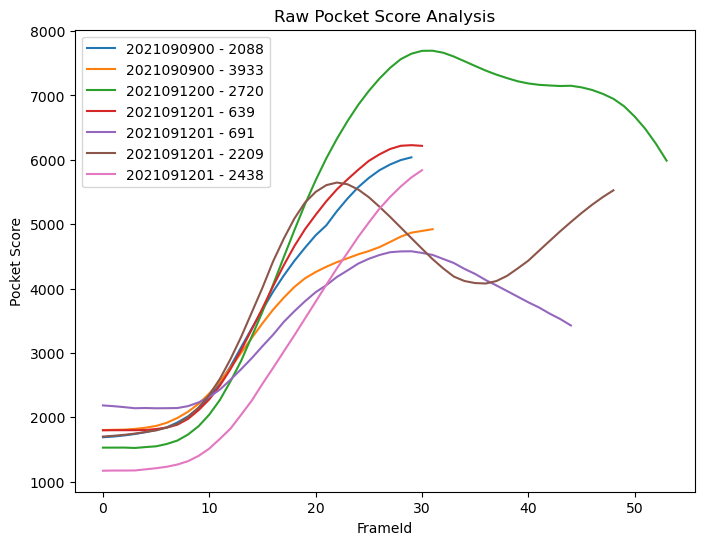

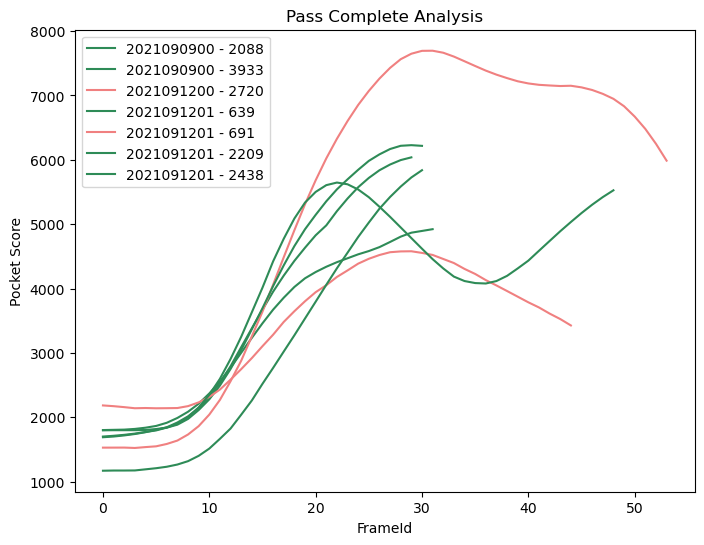

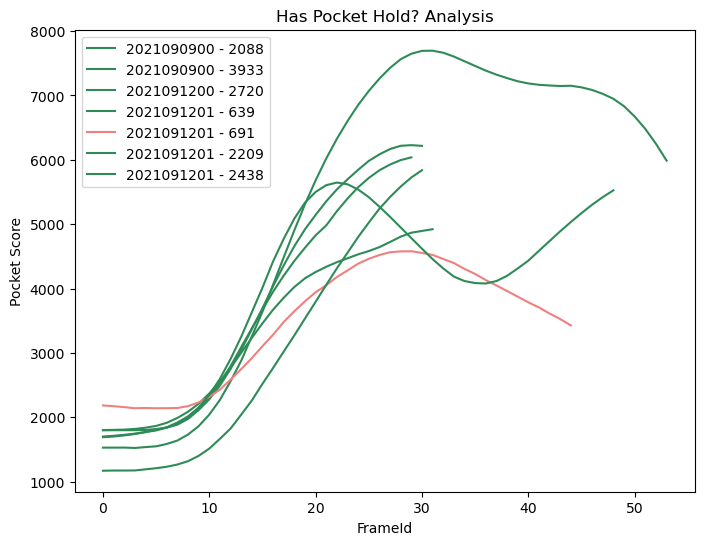

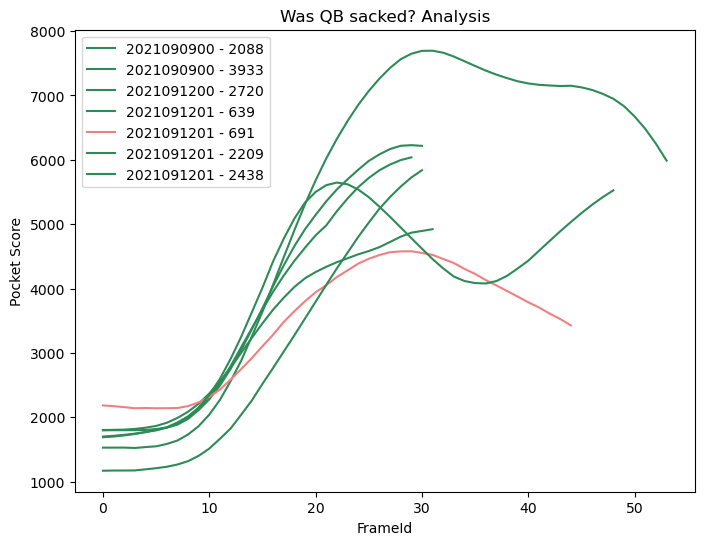

In [5]:
run_short_pipeline(input_path, preprocessing_path, plays.values, config, runId = "short_run_1")